## **Adrián Rubio Pintado y Miguel Ángel Martínez Pay**

Todas las tareas pedidas en la sesión 2 se ejecutan en este notebook, en el que se muestran los resultados de ejecución de todas ellas. Desde este notebook se llama a todas las librerías. El notebook está estructurado con secciones de Google Collab para que sea fácil y rapido moverse entre ellas.
**Todos los detalles de resultados y código se encuentran en la memoria adjunta.**

# **LAB2 - Session 2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/LAB2-Session2')

## **UCF101 Dataset**

Ahora para testear con más clases, **utilizamos el Dataset UCF-101 con más vídeos disponibles,** tal y como se indica en enunciado. Útil ya que necesitamos también más clases de vídeos diferentes(hasta 20).

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2/data

/content/drive/My Drive/Colab Notebooks/LAB2-Session1/data


In [ ]:
!unzip -j UCF20.zip

Archive:  UCF20.zip
  inflating: v_BabyCrawling_g01_c01.avi  
  inflating: v_BabyCrawling_g01_c02.avi  
  inflating: v_BabyCrawling_g01_c03.avi  
  inflating: v_BabyCrawling_g01_c04.avi  
  inflating: v_BabyCrawling_g02_c01.avi  
  inflating: v_BabyCrawling_g02_c02.avi  
  inflating: v_BabyCrawling_g02_c03.avi  
  inflating: v_BabyCrawling_g02_c04.avi  
  inflating: v_BabyCrawling_g02_c05.avi  
  inflating: v_BabyCrawling_g02_c06.avi  
  inflating: v_BabyCrawling_g03_c01.avi  
  inflating: v_BabyCrawling_g03_c02.avi  
  inflating: v_BabyCrawling_g03_c03.avi  
  inflating: v_BabyCrawling_g03_c04.avi  
  inflating: v_BabyCrawling_g04_c01.avi  
  inflating: v_BabyCrawling_g04_c02.avi  
  inflating: v_BabyCrawling_g04_c03.avi  
  inflating: v_BabyCrawling_g04_c04.avi  
  inflating: v_BabyCrawling_g05_c01.avi  
  inflating: v_BabyCrawling_g05_c02.avi  
  inflating: v_BabyCrawling_g05_c03.avi  
  inflating: v_BabyCrawling_g05_c04.avi  
  inflating: v_BabyCrawling_g05_c05.avi  
  inflating: v

In [ ]:
!python3 '1_move_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
Can't find v_Swing_g25_c02.avi to move. Skipping.
Can't find v_Swing_g25_c03.avi to move. Skipping.
Can't find v_Swing_g25_c04.avi to move. Skipping.
Creating folder for train/TableTennisShot
Can't find v_TableTennisShot_g08_c01.avi to move. Skipping.
Can't find v_TableTennisShot_g08_c02.avi to move. Skipping.
Can't find v_TableTennisShot_g08_c03.avi to move. Skipping.
Can't find v_TableTennisShot_g08_c04.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c01.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c02.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c03.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c04.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c05.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c06.avi to move. Skipping.
Can't find v_TableTennisShot_g09_c07.avi to move. Skipping.
Can't find v_TableTennisShot_g10_c01.avi to move. Skipping.
Can't find v_TableTennisSho

In [ ]:
!python3 '2_extract_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
  libavresample   3.  7.  0 /  3.  7.  0
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, avi, from 'test/Bowling/v_Bowling_g06_c06.avi':
  Metadata:
    encoder         : MEncoder r34118-4.2.5
  Duration: 00:00:02.61, start: 0.000000, bitrate: 741 kb/s
    Stream #0:0: Video: mpeg4 (Advanced Simple Profile) (XVID / 0x44495658), yuv420p, 320x240 [SAR 1:1 DAR 4:3], 587 kb/s, 25 fps, 25 tbr, 25 tbn, 25 tbc
    Stream #0:1: Audio: mp3 (U[0][0][0] / 0x0055), 44100 Hz, stereo, s16p, 122 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (mpeg4 (native) -> png (native))
Press [q] to stop, [?] for help
[mpeg4 @ 0x56062b754000] Video uses a non-standard and wasteful way to store B-frames ('packed B-frames'). Consider using the mpeg4_unpack_bframes bitstream filter without encoding but stream copy to fix it.
Output #0, image2, to 'test/Bowling/v_Bowling_g06_c0

## **Code Import**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2/code/

/content/drive/My Drive/Colab Notebooks/LAB2-Session1


In [ ]:
from model_utils  import delete_all_checkpoints_and_logs, delete_unzipped_videos
import train_cnn
import validate_cnn
import plot_train_cnnlog

### **5 Classes**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2/

/content/drive/My Drive/Colab Notebooks/LAB2-Session1


In [ ]:
delete_all_checkpoints_and_logs(folder_data= 'data')

Deleting checkpoints...
Deleting logs...
Done


In [ ]:
train_cnn.execute(None,folder_data='data', class_limit = 5, seq_length = 5 )

87924736/87910968 [==============================] - 2s 0us/step
Found 9490 images belonging to 5 classes.
Found 3909 images belonging to 5 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 190s 19s/step - loss: 5.6863 - accuracy: 0.4000 - val_loss: 2.2713 - val_accuracy: 0.3375
Epoch 2/10
10/10 [==============================] - 130s 14s/step - loss: 1.3623 - accuracy: 0.6500 - val_loss: 0.9808 - val_accuracy: 0.7125
Epoch 3/10
10/10 [==============================] - 129s 14s/step - loss: 0.8209 - accuracy: 0.7125 - val_loss: 0.7834 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 122s 13s/step - loss: 0.3219 - accuracy: 0.9000 - val_loss: 0.3890 - val_accuracy: 0.8625
Epoch 5/10
10/10 [==============================] - 116s 12s/step - loss: 0.4054 - accuracy: 0.8750 - val_loss: 0.6178 - val_accuracy: 0.7375
Epoch 6/10
10/10 [==============================] - 128s 14s/step - loss: 0.7553 - accuracy: 0.7500 - 

Loading model:  data/checkpoints/inception.006-0.15.hdf5
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g07_c02-0022.jpg


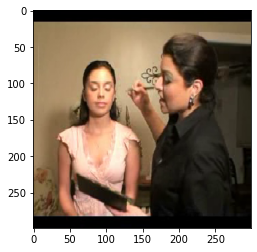

ApplyEyeMakeup: 0.87
ApplyLipstick: 0.12
Archery: 0.00
BabyCrawling: 0.00
BalanceBeam: 0.00
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g01_c03-0017.jpg


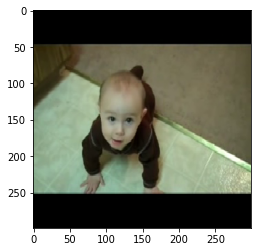

BabyCrawling: 0.99
ApplyEyeMakeup: 0.01
Archery: 0.00
ApplyLipstick: 0.00
BalanceBeam: 0.00
--------------------------------------------------------------------------------
data/test/BalanceBeam/v_BalanceBeam_g02_c04-0006.jpg


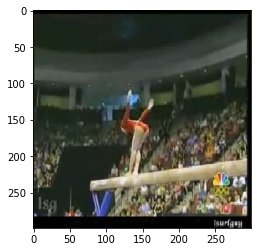

BalanceBeam: 1.00
ApplyLipstick: 0.00
Archery: 0.00
ApplyEyeMakeup: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/Archery/v_Archery_g04_c02-0008.jpg


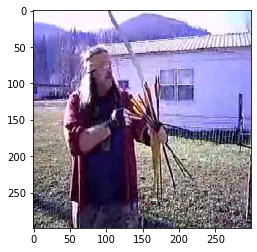

Archery: 1.00
ApplyEyeMakeup: 0.00
BalanceBeam: 0.00
ApplyLipstick: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g04_c01-0013.jpg


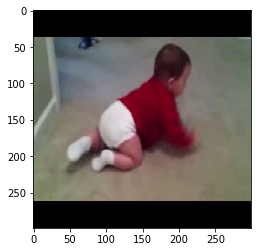

BabyCrawling: 0.99
Archery: 0.00
BalanceBeam: 0.00
ApplyEyeMakeup: 0.00
ApplyLipstick: 0.00


In [ ]:
validate_cnn.execute(folder_data='data',nb_images=5, class_limit = 5, seq_length = 5,  show_images = True) 

Opening:  data/logs/inception-classes_5_training-1652402848.039.log


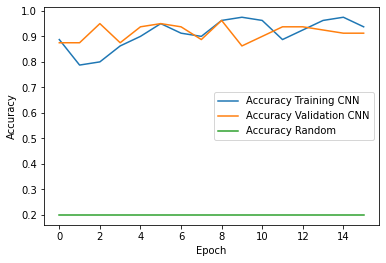

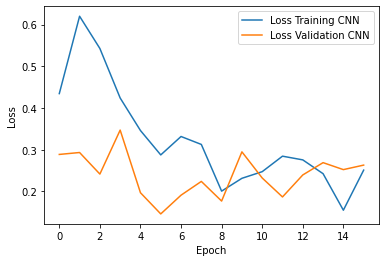

In [ ]:
plot_train_cnnlog.execute(nb_classes = 5,training_log = None,folder_data='data', save_fig_name = False)

### **10 Classes**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2

/content/drive/My Drive/Colab Notebooks/LAB2-Session1


In [ ]:
delete_all_checkpoints_and_logs(folder_data = 'data')

Deleting checkpoints...
Deleting logs...
Done


In [ ]:
N_IMAGES= 10

In [ ]:
train_cnn.execute(None,folder_data='data', class_limit = N_IMAGES, seq_length = 5 )

87924736/87910968 [==============================] - 1s 0us/step
Found 18452 images belonging to 10 classes.
Found 6851 images belonging to 10 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 55s 4s/step - loss: 7.6889 - accuracy: 0.1625 - val_loss: 2.0789 - val_accuracy: 0.4375
Epoch 2/10
10/10 [==============================] - 40s 4s/step - loss: 1.6581 - accuracy: 0.5375 - val_loss: 1.4218 - val_accuracy: 0.5625
Epoch 3/10
10/10 [==============================] - 40s 4s/step - loss: 1.7415 - accuracy: 0.4750 - val_loss: 0.9024 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 38s 4s/step - loss: 0.7689 - accuracy: 0.7375 - val_loss: 0.8669 - val_accuracy: 0.7000
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 0.9133 - accuracy: 0.7250 - val_loss: 1.1819 - val_accuracy: 0.6375
Epoch 6/10
10/10 [==============================] - 39s 4s/step - loss: 0.8728 - accuracy: 0.6974 - val_loss:

Loading model:  data/checkpoints/inception.005-0.11-classes_10_.hdf5
--------------------------------------------------------------------------------
data/test/Archery/v_Archery_g01_c06-0004.jpg


Archery: 0.51
BaseballPitch: 0.32
BalanceBeam: 0.08
Basketball: 0.06
ApplyEyeMakeup: 0.01
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g04_c05-0030.jpg


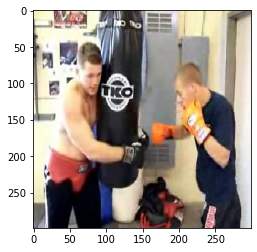

BenchPress: 0.54
BabyCrawling: 0.34
ApplyEyeMakeup: 0.04
Archery: 0.03
ApplyLipstick: 0.02
--------------------------------------------------------------------------------
data/test/BrushingTeeth/v_BrushingTeeth_g06_c03-0021.jpg


ApplyEyeMakeup: 0.48
ApplyLipstick: 0.39
BandMarching: 0.05
BasketballDunk: 0.03
BabyCrawling: 0.02
--------------------------------------------------------------------------------
data/test/Biking/v_Biking_g03_c03-0007.jpg


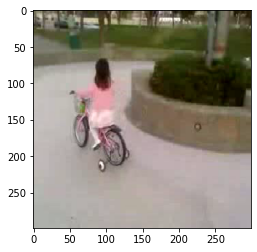

BabyCrawling: 0.63
BandMarching: 0.16
Basketball: 0.12
Archery: 0.05
BenchPress: 0.02
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g01_c04-0006.jpg


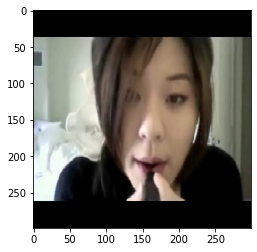

ApplyLipstick: 1.00
ApplyEyeMakeup: 0.00
BandMarching: 0.00
BenchPress: 0.00
Archery: 0.00
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g05_c01-0007.jpg


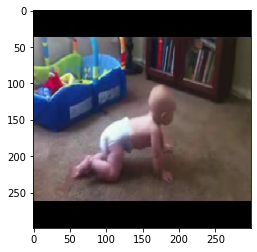

BabyCrawling: 1.00
ApplyEyeMakeup: 0.00
ApplyLipstick: 0.00
BandMarching: 0.00
Archery: 0.00
--------------------------------------------------------------------------------
data/test/BandMarching/v_BandMarching_g02_c06-0001.jpg


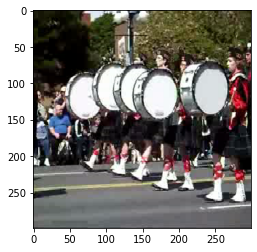

BandMarching: 0.94
BenchPress: 0.05
Basketball: 0.00
Archery: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g07_c04-0014.jpg


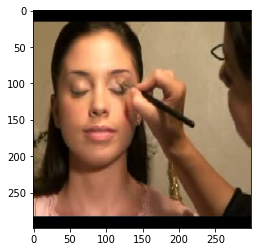

ApplyEyeMakeup: 0.97
ApplyLipstick: 0.03
Archery: 0.00
BandMarching: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05-0013.jpg


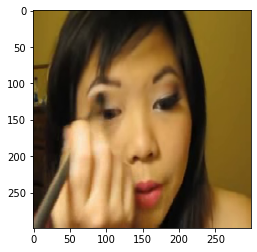

ApplyLipstick: 0.90
ApplyEyeMakeup: 0.10
Archery: 0.00
BandMarching: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03-0010.jpg


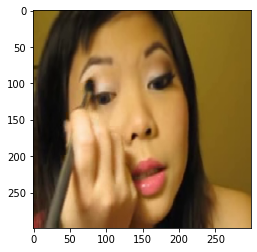

ApplyLipstick: 0.98
ApplyEyeMakeup: 0.02
BandMarching: 0.00
Archery: 0.00
BabyCrawling: 0.00


In [ ]:
validate_cnn.execute(folder_data='data',nb_images=N_IMAGES, class_limit = N_IMAGES, seq_length = 5  ,show_images = True) 

Opening:  data/logs/inception-classes_10_training-1652482467.9192908.log


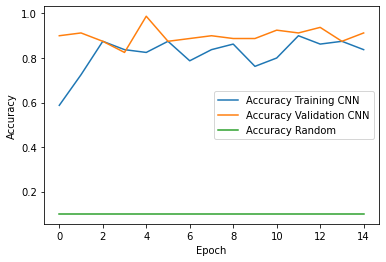

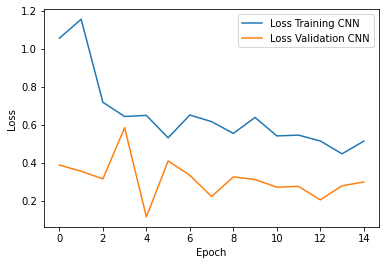

In [ ]:
plot_train_cnnlog.execute(nb_classes = N_IMAGES,training_log = None,folder_data='data', save_fig_name = False)

### **15 Classes**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2

In [ ]:
N_IMAGES= 15

In [ ]:
train_cnn.execute(None,folder_data='data', class_limit = N_IMAGES, seq_length = 5 )

Found 30134 images belonging to 15 classes.
Found 11130 images belonging to 15 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 37s 4s/step - loss: 6.2685 - accuracy: 0.2500 - val_loss: 2.5100 - val_accuracy: 0.2500
Epoch 2/10
10/10 [==============================] - 33s 3s/step - loss: 2.3631 - accuracy: 0.4375 - val_loss: 1.6749 - val_accuracy: 0.5875
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 2.0285 - accuracy: 0.4500 - val_loss: 1.4808 - val_accuracy: 0.5375
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 1.6680 - accuracy: 0.5000 - val_loss: 1.3037 - val_accuracy: 0.5625
Epoch 5/10
10/10 [==============================] - 34s 4s/step - loss: 0.9561 - accuracy: 0.6875 - val_loss: 0.9022 - val_accuracy: 0.7125
Epoch 6/10
10/10 [==============================] - 32s 3s/step - loss: 1.0047 - accuracy: 0.7125 - val_loss: 0.8123 - val_accuracy: 0.7375
Epoch 7/10
10/10 [===============

Loading model:  data/checkpoints/inception.009-0.31-classes_15_.hdf5
--------------------------------------------------------------------------------
data/test/BreastStroke/v_BreastStroke_g04_c03-0011.jpg


Basketball: 0.37
BodyWeightSquats: 0.11
BabyCrawling: 0.11
BaseballPitch: 0.09
Biking: 0.09
--------------------------------------------------------------------------------
data/test/Archery/v_Archery_g05_c01-0056.jpg


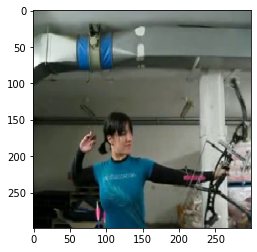

Biking: 0.48
BodyWeightSquats: 0.14
Archery: 0.10
BenchPress: 0.06
Basketball: 0.05
--------------------------------------------------------------------------------
data/test/Basketball/v_Basketball_g07_c03-0016.jpg


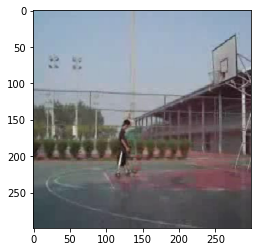

BaseballPitch: 0.35
Basketball: 0.32
BandMarching: 0.07
Biking: 0.06
BenchPress: 0.04
--------------------------------------------------------------------------------
data/test/Billiards/v_Billiards_g06_c02-0027.jpg


Billiards: 1.00
ApplyEyeMakeup: 0.00
BenchPress: 0.00
BlowingCandles: 0.00
BlowDryHair: 0.00
--------------------------------------------------------------------------------
data/test/BoxingSpeedBag/v_BoxingSpeedBag_g07_c06-0023.jpg


ApplyLipstick: 0.30
ApplyEyeMakeup: 0.16
BlowDryHair: 0.13
Archery: 0.08
BabyCrawling: 0.07
--------------------------------------------------------------------------------
data/test/Bowling/v_Bowling_g05_c02-0005.jpg


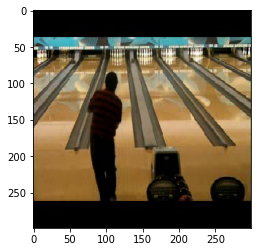

Basketball: 0.21
BandMarching: 0.20
BodyWeightSquats: 0.09
BaseballPitch: 0.09
BasketballDunk: 0.06
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g07_c05-0011.jpg


BlowDryHair: 0.25
Archery: 0.17
BenchPress: 0.12
BodyWeightSquats: 0.10
BaseballPitch: 0.06
--------------------------------------------------------------------------------
data/test/BodyWeightSquats/v_BodyWeightSquats_g06_c03-0012.jpg


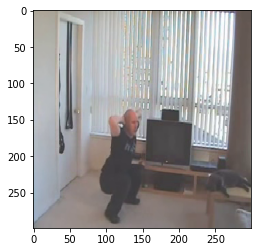

BodyWeightSquats: 0.36
BabyCrawling: 0.28
Archery: 0.16
BenchPress: 0.06
Basketball: 0.03
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g01_c01-0018.jpg


BabyCrawling: 0.95
BodyWeightSquats: 0.01
BlowDryHair: 0.01
Archery: 0.01
ApplyLipstick: 0.00
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g02_c01-0004.jpg


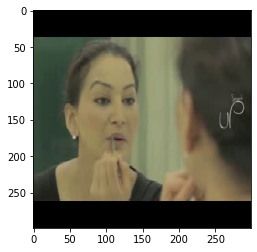

ApplyLipstick: 0.82
ApplyEyeMakeup: 0.06
BandMarching: 0.03
BlowDryHair: 0.02
BabyCrawling: 0.02
--------------------------------------------------------------------------------
data/test/BandMarching/v_BandMarching_g07_c07-0019.jpg


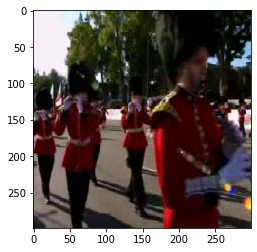

BandMarching: 0.99
Archery: 0.00
BenchPress: 0.00
BaseballPitch: 0.00
Billiards: 0.00
--------------------------------------------------------------------------------
data/test/Bowling/v_Bowling_g02_c01-0003.jpg


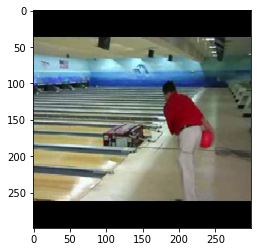

BaseballPitch: 0.35
Basketball: 0.17
BabyCrawling: 0.14
BodyWeightSquats: 0.09
BalanceBeam: 0.07
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g07_c07-0020.jpg


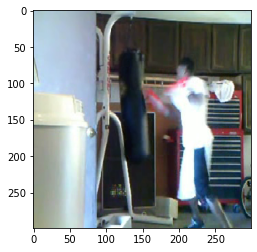

BenchPress: 0.21
BlowDryHair: 0.17
BodyWeightSquats: 0.14
Archery: 0.13
BandMarching: 0.07
--------------------------------------------------------------------------------
data/test/BlowDryHair/v_BlowDryHair_g06_c01-0002.jpg


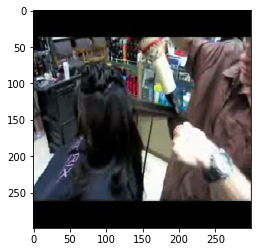

BlowDryHair: 0.79
ApplyEyeMakeup: 0.11
Billiards: 0.02
BandMarching: 0.02
ApplyLipstick: 0.01
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g03_c05-0011.jpg


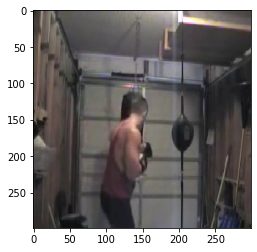

BodyWeightSquats: 0.70
BenchPress: 0.26
Archery: 0.04
BlowDryHair: 0.00
BabyCrawling: 0.00


In [ ]:
import validate_cnn
validate_cnn.execute(folder_data='data',nb_images=N_IMAGES, class_limit = N_IMAGES, seq_length = 5 ,show_images = True)  

Opening:  data/logs/inception-classes_15_training-1652483946.9934568.log


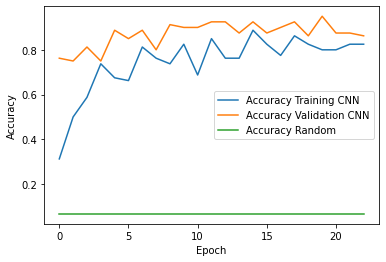

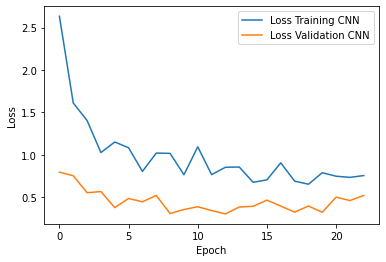

In [ ]:
plot_train_cnnlog.execute(nb_classes = N_IMAGES,training_log = None,folder_data='data', save_fig_name = False)

### **20 Classes**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/LAB2-Session2

In [ ]:
N_IMAGES= 20

In [ ]:
train_cnn.execute(None,folder_data='data', class_limit = N_IMAGES, seq_length = 5 )

Found 42253 images belonging to 20 classes.
Found 16222 images belonging to 20 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 36s 3s/step - loss: 7.0890 - accuracy: 0.0875 - val_loss: 4.2945 - val_accuracy: 0.1500
Epoch 2/10
10/10 [==============================] - 26s 3s/step - loss: 3.3877 - accuracy: 0.2000 - val_loss: 1.8513 - val_accuracy: 0.4500
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 2.5714 - accuracy: 0.2500 - val_loss: 1.8169 - val_accuracy: 0.5250
Epoch 4/10
10/10 [==============================] - 28s 3s/step - loss: 1.9443 - accuracy: 0.3250 - val_loss: 1.8255 - val_accuracy: 0.4625
Epoch 5/10
10/10 [==============================] - 26s 3s/step - loss: 1.5337 - accuracy: 0.5750 - val_loss: 1.1551 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 26s 3s/step - loss: 1.7329 - accuracy: 0.4000 - val_loss: 1.7622 - val_accuracy: 0.5250
Epoch 7/10
10/10 [===============

Loading model:  data/checkpoints/inception.036-0.42-classes_20_.hdf5
--------------------------------------------------------------------------------
data/test/BaseballPitch/v_BaseballPitch_g01_c01-0010.jpg


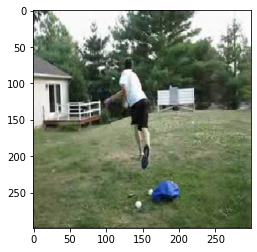

Archery: 0.26
BodyWeightSquats: 0.23
Basketball: 0.14
Biking: 0.09
BaseballPitch: 0.07
--------------------------------------------------------------------------------
data/test/BrushingTeeth/v_BrushingTeeth_g07_c05-0023.jpg


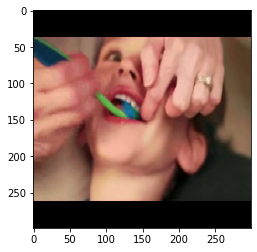

BrushingTeeth: 0.79
ApplyEyeMakeup: 0.07
ApplyLipstick: 0.04
BabyCrawling: 0.02
BlowingCandles: 0.02
--------------------------------------------------------------------------------
data/test/BlowDryHair/v_BlowDryHair_g01_c01-0013.jpg


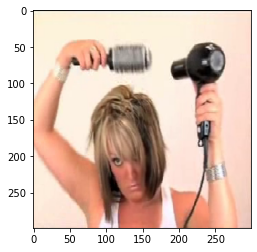

BlowDryHair: 0.97
BoxingPunchingBag: 0.01
ApplyEyeMakeup: 0.00
Archery: 0.00
Billiards: 0.00
--------------------------------------------------------------------------------
data/test/BaseballPitch/v_BaseballPitch_g01_c05-0003.jpg


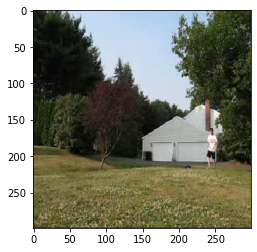

Archery: 0.13
Basketball: 0.09
BabyCrawling: 0.08
BreastStroke: 0.08
BodyWeightSquats: 0.08
--------------------------------------------------------------------------------
data/test/Basketball/v_Basketball_g03_c06-0006.jpg


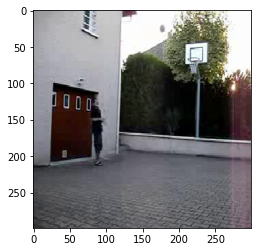

Basketball: 0.74
BoxingPunchingBag: 0.06
Biking: 0.05
Archery: 0.03
BodyWeightSquats: 0.03
--------------------------------------------------------------------------------
data/test/BabyCrawling/v_BabyCrawling_g01_c01-0020.jpg


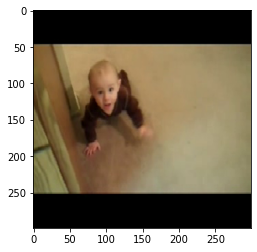

BabyCrawling: 0.93
BreastStroke: 0.01
BrushingTeeth: 0.01
BlowingCandles: 0.01
BoxingSpeedBag: 0.01
--------------------------------------------------------------------------------
data/test/BandMarching/v_BandMarching_g02_c06-0006.jpg


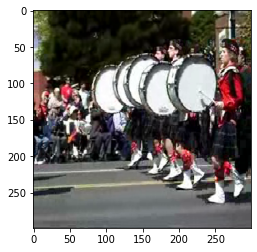

BandMarching: 0.73
BenchPress: 0.05
Archery: 0.03
Billiards: 0.02
Basketball: 0.02
--------------------------------------------------------------------------------
data/test/BandMarching/v_BandMarching_g07_c07-0016.jpg


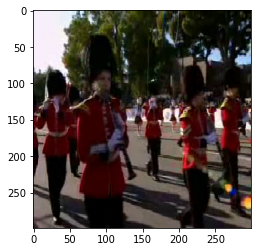

BandMarching: 0.93
Archery: 0.01
BalanceBeam: 0.01
BoxingPunchingBag: 0.01
Basketball: 0.00
--------------------------------------------------------------------------------
data/test/BreastStroke/v_BreastStroke_g03_c01-0020.jpg


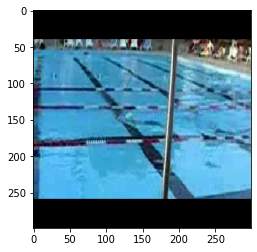

BreastStroke: 0.60
Bowling: 0.08
Basketball: 0.06
BalanceBeam: 0.06
BaseballPitch: 0.04
--------------------------------------------------------------------------------
data/test/BlowingCandles/v_BlowingCandles_g05_c03-0003.jpg


BlowingCandles: 0.73
Billiards: 0.03
BandMarching: 0.03
Archery: 0.02
BoxingPunchingBag: 0.02
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c06-0003.jpg


ApplyLipstick: 0.35
BrushingTeeth: 0.31
ApplyEyeMakeup: 0.09
Billiards: 0.04
BlowDryHair: 0.02
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g05_c05-0012.jpg


BoxingSpeedBag: 0.44
BoxingPunchingBag: 0.36
BodyWeightSquats: 0.09
BlowDryHair: 0.04
Archery: 0.04
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04-0006.jpg


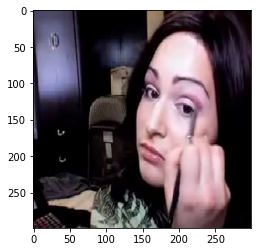

ApplyLipstick: 0.52
ApplyEyeMakeup: 0.30
BrushingTeeth: 0.12
BlowDryHair: 0.03
Billiards: 0.02
--------------------------------------------------------------------------------
data/test/Biking/v_Biking_g07_c03-0039.jpg


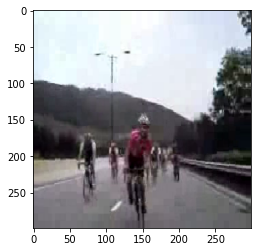

Biking: 0.94
BandMarching: 0.04
Basketball: 0.01
BasketballDunk: 0.00
BaseballPitch: 0.00
--------------------------------------------------------------------------------
data/test/BrushingTeeth/v_BrushingTeeth_g03_c01-0004.jpg


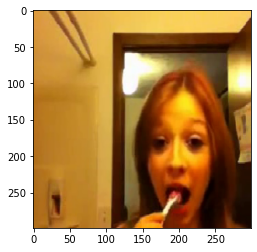

ApplyLipstick: 0.76
BrushingTeeth: 0.11
ApplyEyeMakeup: 0.02
Billiards: 0.02
BoxingSpeedBag: 0.01
--------------------------------------------------------------------------------
data/test/Archery/v_Archery_g04_c03-0007.jpg


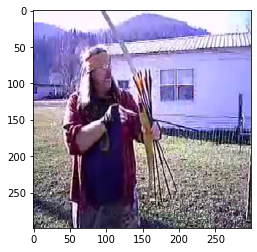

Archery: 1.00
BoxingSpeedBag: 0.00
BodyWeightSquats: 0.00
BlowDryHair: 0.00
BenchPress: 0.00
--------------------------------------------------------------------------------
data/test/Biking/v_Biking_g05_c04-0002.jpg


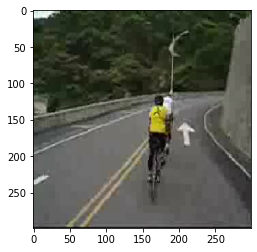

Biking: 0.98
BandMarching: 0.00
Basketball: 0.00
BasketballDunk: 0.00
Archery: 0.00
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g01_c03-0022.jpg


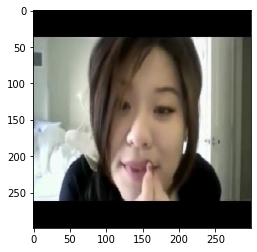

BrushingTeeth: 0.48
ApplyLipstick: 0.39
ApplyEyeMakeup: 0.06
Billiards: 0.01
BlowingCandles: 0.01
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g01_c04-0010.jpg


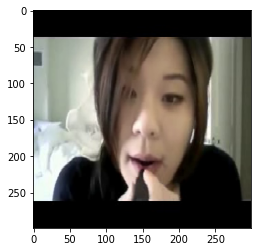

ApplyLipstick: 0.81
BrushingTeeth: 0.12
ApplyEyeMakeup: 0.03
Billiards: 0.01
BlowDryHair: 0.01
--------------------------------------------------------------------------------
data/test/Billiards/v_Billiards_g07_c04-0024.jpg


Billiards: 1.00
BreastStroke: 0.00
ApplyLipstick: 0.00
BalanceBeam: 0.00
BaseballPitch: 0.00


In [ ]:
validate_cnn.execute(folder_data='data',nb_images=N_IMAGES, class_limit = N_IMAGES, seq_length = 5 ,show_images = True) 

Opening:  data/logs/inception-classes_20_training-1652485166.0181987.log


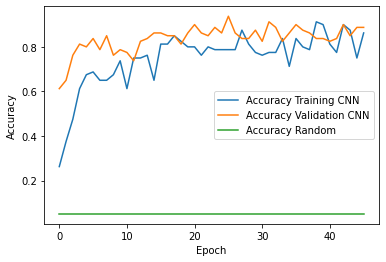

In [ ]:
plot_train_cnnlog.execute(nb_classes = N_IMAGES,training_log = None,folder_data='data', save_fig_name = False)